In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
def spline_cubica(x, y):
    n = len(x) - 1
    matriz_spline_cubica = np.zeros([4*n, 4*n])
    B_spline_cubica = np.zeros((4*n))

    index_1 = 0

    for i in range(n):
    # Preenchimento do intervalo (x(i), x(i+1))
        matriz_spline_cubica[index_1, 4*i] = x[i]**3
        matriz_spline_cubica[index_1, 4*i + 1] = x[i]**2
        matriz_spline_cubica[index_1, 4*i + 2] = x[i]
        matriz_spline_cubica[index_1, 4*i + 3] = 1
        B_spline_cubica[index_1] = y[i]
        index_1 += 1

        matriz_spline_cubica[index_1, 4*i] = x[i+1]**3
        matriz_spline_cubica[index_1, 4*i + 1] = x[i+1]**2
        matriz_spline_cubica[index_1, 4*i + 2] = x[i+1]
        matriz_spline_cubica[index_1, 4*i + 3] = 1
        B_spline_cubica[index_1] = y[i+1]
        index_1 += 1

    for i in range(1, n):
    # Continuidade da primeira derivada
        matriz_spline_cubica[index_1, 4*(i-1)] = 3 * x[i]**2
        matriz_spline_cubica[index_1, 4*(i-1) + 1] = 2 * x[i]
        matriz_spline_cubica[index_1, 4*(i-1) + 2] = 1

        matriz_spline_cubica[index_1, 4*(i)] = - 3 * x[i]**2
        matriz_spline_cubica[index_1, 4*(i) + 1] = - 2 * x[i]
        matriz_spline_cubica[index_1, 4*(i) + 2] = -1      
 
        B_spline_cubica[index_1] = 0
        index_1 += 1

    for i in range(1, n):
    # Continuidade da segunda derivada
        matriz_spline_cubica[index_1, 4*(i-1)] = 6 * x[i]
        matriz_spline_cubica[index_1, 4*(i-1) + 1] = 2

        matriz_spline_cubica[index_1, 4*i] = -6 * x[i]
        matriz_spline_cubica[index_1, 4*i + 1] = -2
    
        B_spline_cubica[index_1] = 0
        index_1 += 1



    # Condições de fronteira

    matriz_spline_cubica[index_1, 0] = 6 * x[0]
    matriz_spline_cubica[index_1, 1] = 2
    B_spline_cubica[index_1] = 0
    index_1 += 1

    matriz_spline_cubica[index_1, 4*(n-1)]   = 6 * x[n]
    matriz_spline_cubica[index_1, 4*(n-1)+1] = 2
    B_spline_cubica[index_1] = 0
    index_1 += 1


    coeficientes_1 = np.linalg.solve(matriz_spline_cubica, B_spline_cubica)
    spline_coeficientes_1 = coeficientes_1.reshape(n, 4)
    print(spline_coeficientes_1)

    return spline_coeficientes_1

In [3]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv'
df = pd.read_csv(url, header=0, parse_dates=[0], index_col=0)

C:\Users\vicen\AppData\Local\Temp\ipykernel_16180\1476126780.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(url, header=0, parse_dates=[0], index_col=0)


In [ ]:
y_mensal = df.values
x_mensal = np.arange(len(y_mensal))
n = len(x_mensal) - 1

[[266. ]
 [145.9]
 [183.1]
 [119.3]
 [180.3]
 [168.5]
 [231.8]
 [224.5]
 [192.8]
 [122.9]
 [336.5]
 [185.9]
 [194.3]
 [149.5]
 [210.1]
 [273.3]
 [191.4]
 [287. ]
 [226. ]
 [303.6]
 [289.9]
 [421.6]
 [264.5]
 [342.3]
 [339.7]
 [440.4]
 [315.9]
 [439.3]
 [401.3]
 [437.4]
 [575.5]
 [407.6]
 [682. ]
 [475.3]
 [581.3]
 [646.9]]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]


In [8]:
coeficientes_spline_cubica = spline_cubica(x_mensal, y_mensal)

[[ 5.23072964e+01  0.00000000e+00 -1.72407296e+02  2.66000000e+02]
 [-1.04236482e+02  4.69631336e+02 -6.42038632e+02  4.22543779e+02]
 [ 1.06338632e+02 -7.93819351e+02  1.88486274e+03 -1.26205714e+03]
 [-9.53180472e+01  1.02109076e+03 -3.55986761e+03  4.18267321e+03]
 [ 7.73335564e+01 -1.05072848e+03  4.72740937e+03 -6.86702942e+03]
 [-6.61161786e+01  1.10101755e+03 -6.03132076e+03  1.10641875e+04]
 [ 4.14311579e+01 -8.34834511e+02  5.58379159e+03 -1.21660372e+04]
 [-5.34084531e+01  1.15679732e+03 -8.35763124e+03  2.03639494e+04]
 [ 1.58402655e+02 -3.92666926e+03  3.23101014e+04 -8.80833378e+04]
 [-2.58502165e+02  7.32976087e+03 -6.89977698e+04  2.15840276e+05]
 [ 2.27906007e+02 -7.26248429e+03  7.69246819e+04 -2.70567896e+05]
 [-1.29921862e+02  4.54583538e+03 -5.29668345e+04  2.05700997e+05]
 [ 7.95814410e+01 -2.99628353e+03  3.75385924e+04 -1.56320710e+05]
 [-2.98039021e+01  1.26974485e+03 -1.79197766e+04  8.39988885e+04]
 [-6.31658325e+01  2.67094593e+03 -3.75365917e+04  1.75544025e

C:\Users\vicen\AppData\Local\Temp\ipykernel_16180\3345328134.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  B_spline_cubica[index_1] = y[i]
C:\Users\vicen\AppData\Local\Temp\ipykernel_16180\3345328134.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  B_spline_cubica[index_1] = y[i+1]


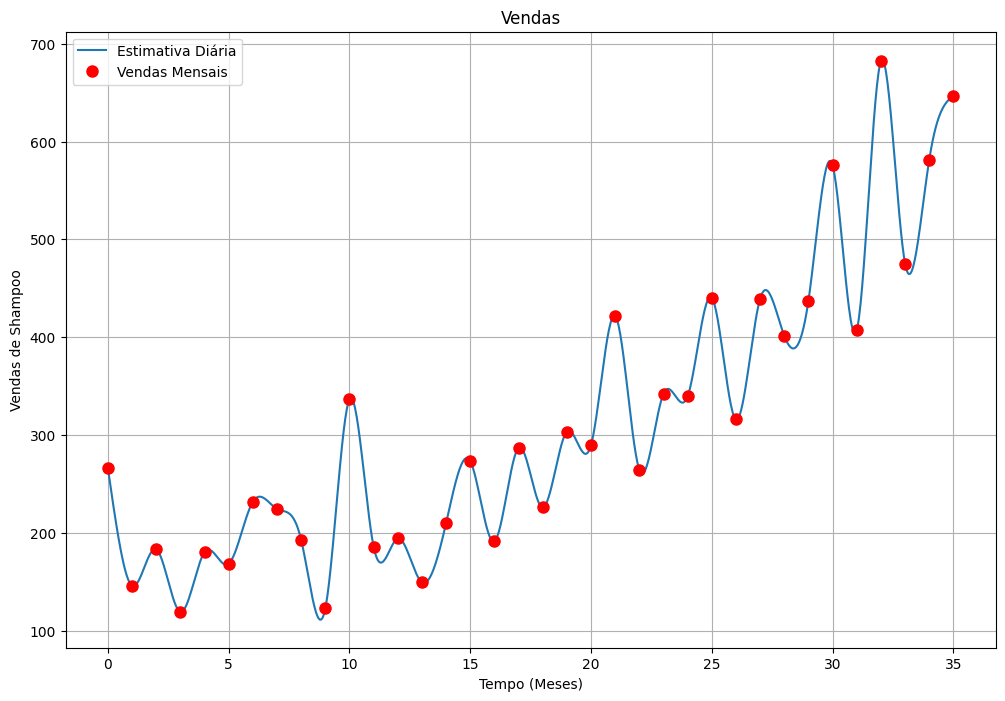

In [23]:

dias_por_mes = 30.44 # Média de dias por mês, levando em conta anos bissextos
num_dias_total = int(len(y_mensal) * dias_por_mes)
x_diario = np.linspace(x_mensal.min(), x_mensal.max(), num_dias_total)

y_diario_previsto_lista = []

# Fazendo o UpSampling
for x_dia in x_diario:
    for i in range(n):
        if x_mensal[i] <= x_dia <= x_mensal[i+1]: # Verifica se o dia atual está neste intervalo
            a, b, c, d = coeficientes_spline_cubica[i] # Pegando os coeficientes
            
            y_previsto = a * x_dia**3 + b * x_dia**2 + c * x_dia + d # Calculando o y estimado para este dia específico
            
            y_diario_previsto_lista.append(y_previsto)
            
            break

y_diario_estimado = np.array(y_diario_previsto_lista)

plt.figure(figsize=(12, 8))
plt.plot(x_diario, y_diario_estimado, label='Estimativa Diária')
plt.plot(x_mensal, y_mensal, 'ro', markersize=8, label='Vendas Mensais')
plt.title('Vendas')
plt.xlabel('Tempo (Meses)')
plt.ylabel('Vendas de Shampoo')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
# Prevendo a estimativa diaria em dias aleatorios

previsao1 = y_diario_estimado[5] # dia 6
previsao2 = y_diario_estimado[101] # dia 102
previsao3 = y_diario_estimado[1094] # dia 1095

print(previsao1, previsao2, previsao3)

238.63524014855844 125.25274792011169 646.8999999999069
